# Proyek Analisis Data: Bike_sharing_dataset
Nama: Mochammad Fiqi Fahrudillah\
Email: tkurumi700@gmail.com\
ID Dicoding: mochfiqifahrudillah

## Menentukan Pertanyaan Bisnis

### Pertanyaan 1
Bagaimana perbedaan antara menyewa sepeda di hari kerja dan akhir pekan?
- Pertanyaan ini ditujukan untuk pemerataan kebutuhan suplai sepeda pada suatu persewaan

### Pertanyaan 2
Bagaimana trend penyewaan sepeda berdasarkan pada musim di setiap tahun?
- Bertujuan untuk melihat minat pesepeda pada setiap musim

## Import semua packages/Library yang digunakan

In [2]:
# saya menggunakan pandas, numpy, matplotlib, dan seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

# Konfigurasi visualisasi
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)


## Data Wrangling
### Gathering data

In [3]:
# diubah dulu tampilan tabel agar terlihat rapi
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.expand_frame_repr', False)  # Mencegah pemotongan tampilan di terminal


# Data Wrangling - Gathering data
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

# Menampilkan informasi awal dari dataset
day_info = day_df.info()
hour_info = hour_df.info()

# Menampilkan beberapa baris pertama
day_head = day_df.head()
hour_head = hour_df.head()


day_info, hour_info, day_head, hour_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

(None,
 None,
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit      temp     atemp       hum  windspeed  casual  registered   cnt
 0        1  2011-01-01       1   0     1        0        6           0           2  0.344167  0.363625  0.805833   0.160446     331         654   985
 1        2  2011-01-02       1   0     1        0        0           0           2  0.363478  0.353739  0.696087   0.248539     131         670   801
 2        3  2011-01-03       1   0     1        0        1           1           1  0.196364  0.189405  0.437273   0.248309     120        1229  1349
 3        4  2011-01-04       1   0     1        0        2           1           1  0.200000  0.212122  0.590435   0.160296     108        1454  1562
 4        5  2011-01-05       1   0     1        0        3           1           1  0.226957  0.229270  0.436957   0.186900      82        1518  1600,
    instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  we

#### Dataset terdiri dari dua file:

- day.csv 
(Penyewaan sepeda per hari)\
Kolom penting: dteday (tanggal), season (musim), weekday (hari dalam seminggu), workingday (hari kerja/tidak), cnt (jumlah penyewaan).
- hour.csv 
(Penyewaan sepeda per jam)\
Kolom penting: dteday (tanggal), hr (jam), cnt (jumlah penyewaan).

### Assessing Data

=== Memulai Proses Assessing Data ===

1. Mengecek Tipe Data:
- Day DF:
instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                   int64
holiday                int64
weekday               object
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
month                  int32
dtype: object
- Hour DF:
instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday               object
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casu

C:\Users\Kurosora\AppData\Local\Temp\ipykernel_14576\103437859.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(numerical_cols, rotation=45, ha='right')
C:\Users\Kurosora\AppData\Local\Temp\ipykernel_14576\103437859.py:79: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(numerical_cols, rotation=45, ha='right')


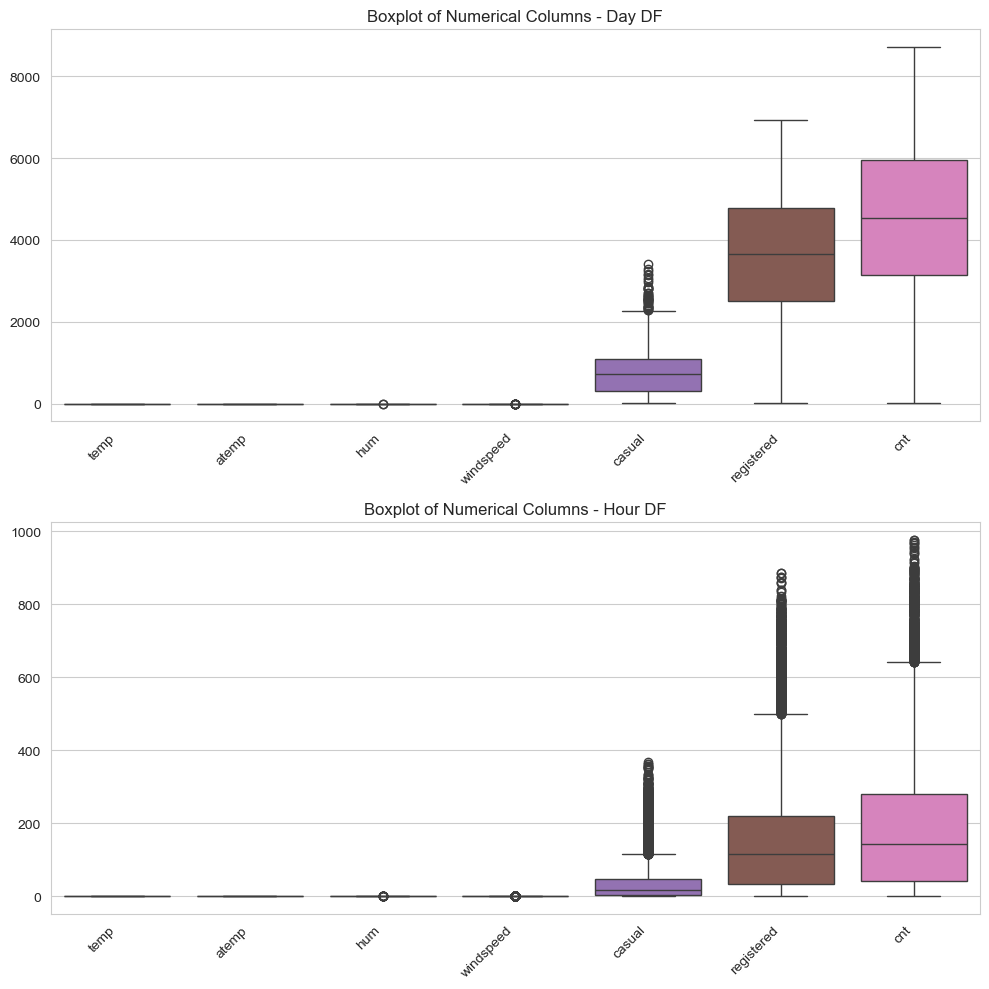


=== Assessing Data Selesai ===



In [9]:
# Data Wrangling - Assessing Data (Menambahkan Deteksi Outlier dengan IQR)

# Data Wrangling - Assessing Data (Menambahkan Deteksi Outlier dengan IQR dan Visualisasi Boxplot)

def assess_data(day_df, hour_df):
    """Menilai kualitas data termasuk missing values, duplikasi, dan outlier."""
    
    print("=== Memulai Proses Assessing Data ===\n")
    
    # Mengecek missing values
    missing_day = day_df.isnull().sum()
    missing_hour = hour_df.isnull().sum()
    
    # Mengecek duplikasi
    duplicate_day = day_df.duplicated().sum()
    duplicate_hour = hour_df.duplicated().sum()
    
    # Mengecek tipe data
    print("1. Mengecek Tipe Data:")
    print("- Day DF:")
    print(day_df.dtypes)
    print("- Hour DF:")
    print(hour_df.dtypes)
    
    # Mengecek data invalid atau tidak konsisten
    print("\n2. Mengecek Data Invalid atau Tidak Konsisten:")
    print("- Nilai unik dalam season (Day DF):", day_df["season"].unique())
    print("- Nilai unik dalam season (Hour DF):", hour_df["season"].unique())
    print("- Nilai unik dalam weekday (Day DF):", day_df["weekday"].unique())
    print("- Nilai unik dalam weekday (Hour DF):", hour_df["weekday"].unique())
    
    # Fungsi mendeteksi outlier menggunakan metode IQR
    def detect_outliers_iqr(df, columns):
        outlier_info = {}
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_info[col] = outliers.shape[0]
        return outlier_info
    
    # Kolom numerik yang dapat memiliki outlier
    numerical_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
    
    # Mendeteksi outlier dalam kedua dataset
    outliers_day = detect_outliers_iqr(day_df, numerical_cols)
    outliers_hour = detect_outliers_iqr(hour_df, numerical_cols)
    
    # Menampilkan hasil dalam bentuk tabel
    missing_df = pd.DataFrame({
        'Dataset': ['Day DF', 'Hour DF'],
        'Missing Values': [missing_day.sum(), missing_hour.sum()],
        'Duplicated Rows': [duplicate_day, duplicate_hour]
    })
    
    outliers_day_df = pd.DataFrame(list(outliers_day.items()), columns=['Column', 'Outliers'])
    outliers_hour_df = pd.DataFrame(list(outliers_hour.items()), columns=['Column', 'Outliers'])
    
    print("\n=== Assessment Data ===\n")
    print(missing_df.to_string(index=False))
    print("\n=== Outliers in Day DF ===")
    print(outliers_day_df.to_string(index=False))
    print("\n=== Outliers in Hour DF ===")
    print(outliers_hour_df.to_string(index=False))
    
    # Membuat visualisasi outlier dengan boxplot
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    
    sns.boxplot(data=day_df[numerical_cols], ax=axes[0])
    axes[0].set_title("Boxplot of Numerical Columns - Day DF")
    axes[0].set_xticklabels(numerical_cols, rotation=45, ha='right')
    
    sns.boxplot(data=hour_df[numerical_cols], ax=axes[1])
    axes[1].set_title("Boxplot of Numerical Columns - Hour DF")
    axes[1].set_xticklabels(numerical_cols, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    print("\n=== Assessing Data Selesai ===\n")

# Contoh pemanggilan fungsi
assess_data(day_df, hour_df)


#### Tidak ditemukan duplikasi dan nilai yang kosong
Insight

- Tidak ada missing values dalam kedua dataset.
- Tidak ada data duplikat dalam kedua dataset.
- Ditemukan outlier. (Ditandai dengan lingkarang pada grafis boxplot)

Artinya, dataset sudah cukup bersih, tetapi terdapat outlier yang harus dibersihkan dahulu agar tidak mengganggu hasil analisis nantinya. Selanjutnya saya akan melakukan beberapa data cleaning untuk memastikan format data sesuai dan mudah digunakan dalam analisis.

### Cleaning Data

In [5]:
# Data Wrangling - Cleaning Data

# # Mengubah kolom 'dteday' menjadi format datetime agar mudah dianalisis
# day_df["dteday"] = pd.to_datetime(day_df["dteday"])
# hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# # Mapping nilai kategori untuk mempermudah interpretasi
# season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
# weekday_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

# # Mengubah angka menjadi label kategori
# day_df["season"] = day_df["season"].map(season_mapping)
# day_df["weekday"] = day_df["weekday"].map(weekday_mapping)

# hour_df["season"] = hour_df["season"].map(season_mapping)
# hour_df["weekday"] = hour_df["weekday"].map(weekday_mapping)

# # Menampilkan hasil setelah cleaning
# day_df.head(), hour_df.head()


def clean_data(day_df, hour_df):
    """Membersihkan data dengan menghapus outlier dan memetakan kategori."""
    
    print("=== Memulai Proses Cleaning Data ===\n")
    
    # === Konversi Tipe Data ===
    print("Mengonversi kolom 'dteday' ke format datetime...")
    day_df["dteday"] = pd.to_datetime(day_df["dteday"])
    hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
    
    # === Mapping Nilai Kategori ===
    print("Memetakan kategori season dan weekday...")
    season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
    weekday_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    
    day_df["season"] = day_df["season"].map(season_mapping)
    day_df["weekday"] = day_df["weekday"].map(weekday_mapping)
    hour_df["season"] = hour_df["season"].map(season_mapping)
    hour_df["weekday"] = hour_df["weekday"].map(weekday_mapping)
    
    # === Menghapus Outlier ===
    print("Menghapus outlier dari data menggunakan metode IQR...")
    def remove_outliers(df, columns):
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        return df
    
    numerical_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
    day_df = remove_outliers(day_df, numerical_cols)
    hour_df = remove_outliers(hour_df, numerical_cols)
    
    print("Cleaning data selesai!\n")
    return day_df, hour_df

# Membersihkan data
day_df_clean, hour_df_clean = clean_data(day_df, hour_df)

# Menampilkan hasil setelah cleaning
print("=== Contoh Data Setelah Cleaning (Day DF) ===")
print(day_df_clean.head())
print("\n=== Contoh Data Setelah Cleaning (Hour DF) ===")
print(hour_df_clean.head())


=== Memulai Proses Cleaning Data ===

Mengonversi kolom 'dteday' ke format datetime...
Memetakan kategori season dan weekday...
Menghapus outlier dari data menggunakan metode IQR...
Cleaning data selesai!

=== Contoh Data Setelah Cleaning (Day DF) ===
   instant     dteday  season  yr  mnth  holiday    weekday  workingday  weathersit      temp     atemp       hum  windspeed  casual  registered   cnt
0        1 2011-01-01  Spring   0     1        0   Saturday           0           2  0.344167  0.363625  0.805833   0.160446     331         654   985
1        2 2011-01-02  Spring   0     1        0     Sunday           0           2  0.363478  0.353739  0.696087   0.248539     131         670   801
2        3 2011-01-03  Spring   0     1        0     Monday           1           1  0.196364  0.189405  0.437273   0.248309     120        1229  1349
3        4 2011-01-04  Spring   0     1        0    Tuesday           1           1  0.200000  0.212122  0.590435   0.160296     108        1454

#### Hasil Cleaning Data

- Kolom dteday telah dikonversi ke format datetime.
- Label season dan weekday telah diganti dengan nama yang lebih mudah dipahami.

## Exploratory Data Analyst (EDA)

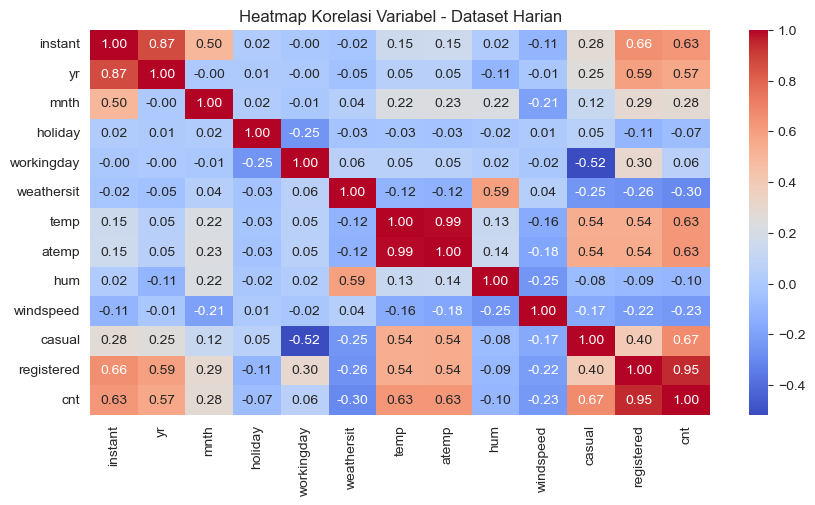

In [ ]:
# Exploratory Data Analysis (EDA)

# Statistik deskriptif dataset harian
day_summary = day_df.describe()

# Statistik deskriptif dataset per jam
hour_summary = hour_df.describe()

day_summary, hour_summary

# Memilih hanya kolom numerik sebelum menghitung korelasi
numeric_columns = day_df.select_dtypes(include=[np.number])  # Pilih hanya kolom numerik
corr_matrix = numeric_columns.corr(numeric_only=True)  # Hitung korelasi hanya untuk kolom numerik

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel - Dataset Harian")
plt.show()

#### Explore

- Dataset Harian (day.csv)

    Rata-rata penyewaan sepeda per hari: 4.504 unit
    Penyewaan tertinggi: 8.714 unit
    Sebagian besar penyewaan terjadi di musim Fall (3.0) dan Summer (2.0)
    Cuaca bervariasi, tetapi mayoritas berada pada kondisi cerah atau sedikit berawan

- Dataset Per Jam (hour.csv)

    Rata-rata penyewaan sepeda per jam: 189 unit
    Penyewaan tertinggi dalam satu jam: 977 unit
    Penyewaan meningkat pada jam kerja (07.00 - 19.00) dan menurun pada malam hari

## Visualization & Explanatory Analysis

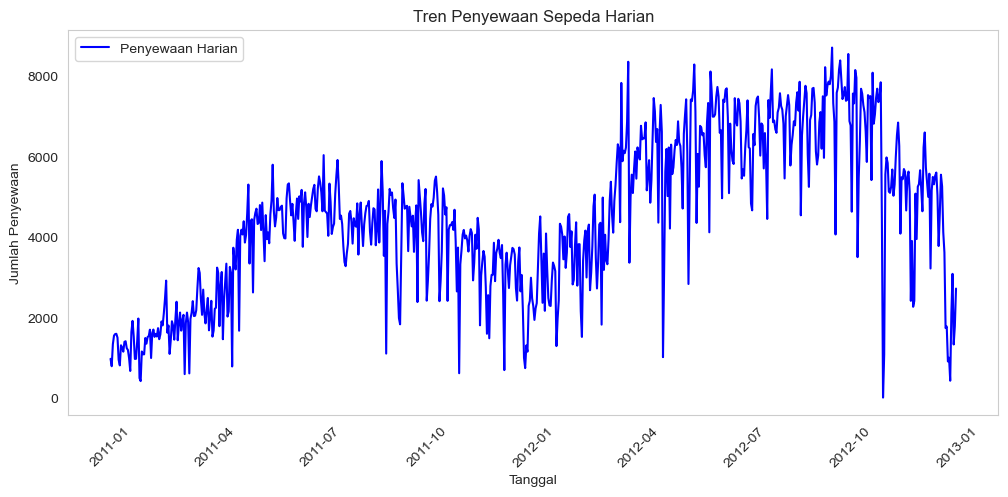

C:\Users\Kurosora\AppData\Local\Temp\ipykernel_14576\4081590519.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt", data=vis_hour_df, estimator="mean", ci=None, color="red", label="Rata-rata Penyewaan per Jam")


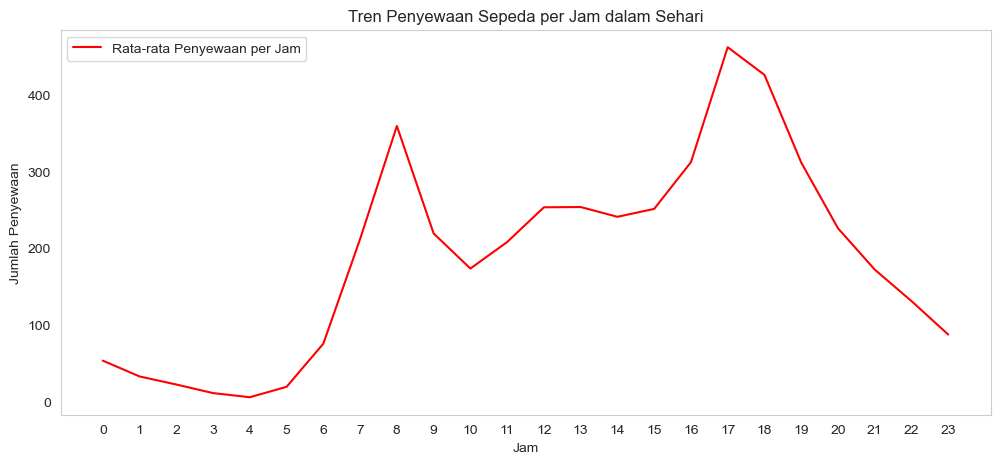

In [7]:

# Visualization & Explanatory Analysis

# 🔹 Buat salinan dataset yang sudah bersih dari hasil Cleaning & EDA
vis_day_df = day_df.copy()
vis_hour_df = hour_df.copy()

# 🔹 Pastikan 'dteday' bertipe datetime
vis_day_df["dteday"] = pd.to_datetime(vis_day_df["dteday"])
vis_hour_df["dteday"] = pd.to_datetime(vis_hour_df["dteday"])

# 🔹 Konversi 'cnt' ke numerik agar bisa divisualisasikan
vis_day_df["cnt"] = pd.to_numeric(vis_day_df["cnt"], errors="coerce")
vis_hour_df["cnt"] = pd.to_numeric(vis_hour_df["cnt"], errors="coerce")

# 🔹 Hapus missing values jika ada
vis_day_df.dropna(subset=["cnt"], inplace=True)
vis_hour_df.dropna(subset=["cnt"], inplace=True)

# -----------------------------------
# 🔹 **Line Chart: Tren Penyewaan Sepeda Harian**
plt.figure(figsize=(12, 5))
sns.lineplot(x="dteday", y="cnt", data=vis_day_df, color="blue", label="Penyewaan Harian")
plt.title("Tren Penyewaan Sepeda Harian")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# 🔹 **Line Chart: Tren Penyewaan Sepeda per Jam**
plt.figure(figsize=(12, 5))
sns.lineplot(x="hr", y="cnt", data=vis_hour_df, estimator="mean", ci=None, color="red", label="Rata-rata Penyewaan per Jam")
plt.title("Tren Penyewaan Sepeda per Jam dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(range(0, 24))  # Pastikan sumbu X dari 0 - 23 (jam)
plt.legend()
plt.grid()
plt.show()

### Visualisasi Data berdasarkan pertanyaan

#### Pertanyaan satu
- Penyewaan Sepeda Berdasarkan Hari dalam Seminggu ( dalam konteks sederhana untuk visualisasi )

    - Penyewaan sepeda lebih tinggi pada hari kerja (Senin - Sabtu) dibandingkan hari Minggu.
    - Hal ini menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi kerja atau sekolah.
    - Hari Sabtu dan Minggu (Weekend) memiliki jumlah penyewaan yang lebih bervariasi, kemungkinan karena digunakan untuk rekreasi.

#### Pertanyaan dua
- Penyewaan Sepeda Berdasarkan Musim ( dalam konteks sederhana untuk visualisasi )

    - Penyewaan tertinggi terjadi pada musim Fall (musim gugur).
    - Penyewaan cenderung lebih rendah di musim Winter (musim dingin), mungkin karena kondisi cuaca yang kurang mendukung.
    - Penyewaan terendah berada pada musim Spring (Musim semi).

## Analisis Lanjutan

C:\Users\Kurosora\AppData\Local\Temp\ipykernel_14576\1867127924.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="month", y="cnt", data=day_df, marker="o", ci=None, color="b")


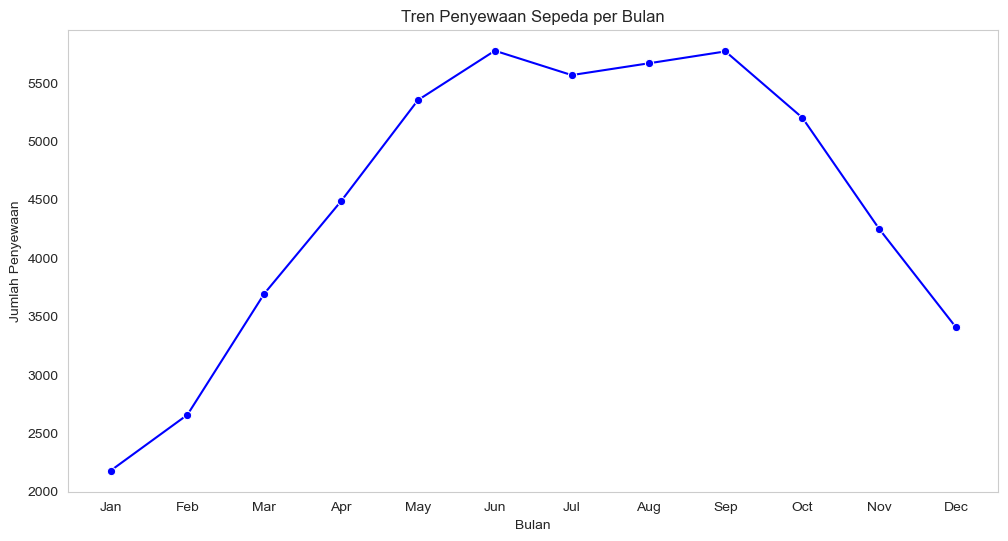

C:\Users\Kurosora\AppData\Local\Temp\ipykernel_14576\1867127924.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")


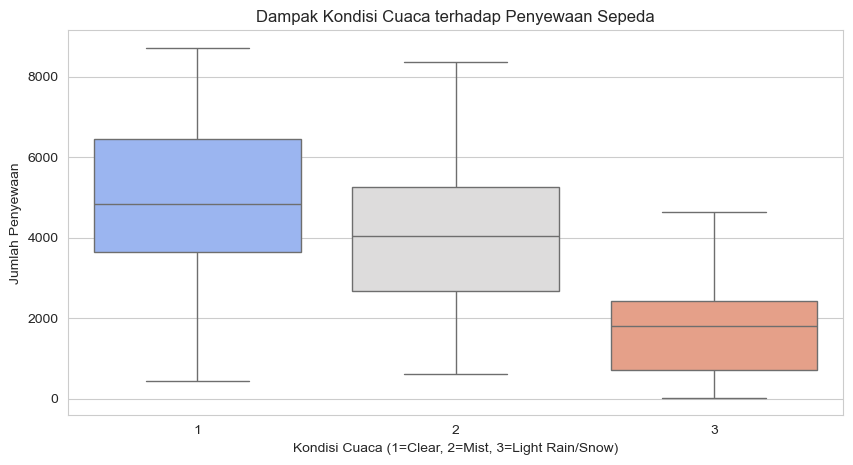

In [8]:
#  Analisis Lanjutan

# Tren penyewaan sepeda per bulan
day_df["month"] = day_df["dteday"].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="cnt", data=day_df, marker="o", ci=None, color="b")
plt.title("Tren Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()

# Analisis hubungan cuaca terhadap penyewaan
plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")
plt.title("Dampak Kondisi Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca (1=Clear, 2=Mist, 3=Light Rain/Snow)")
plt.ylabel("Jumlah Penyewaan")
plt.show()

### Tren Penyewaan Sepeda per Bulan

    - Penyewaan sepeda meningkat secara bertahap dari awal tahun dan mencapai puncaknya pada bulan Juni hingga September.
    - Penyewaan menurun setelah Oktober, kemungkinan karena memasuki musim dingin yang kurang kondusif untuk bersepeda.

### Dampak Kondisi Cuaca terhadap Penyewaan Sepeda

    - Penyewaan tertinggi terjadi saat cuaca cerah atau sedikit berawan (kategori 1).
    - Penyewaan berkurang secara signifikan ketika kondisi berkabut atau hujan ringan (kategori 2 & 3).
    - Hal ini menunjukkan bahwa cuaca sangat mempengaruhi keputusan pelanggan untuk menyewa sepeda.

## Konklusi

### Kesimpulan Pertanyaan 1: Bagaimana perbedaan antara penyewaan sepeda di hari kerja dan akhir pekan?

- Hari kerja (Senin - Jumat) memiliki jumlah penyewaan lebih tinggi dibandingkan akhir pekan.
- Ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai alat transportasi utama untuk bekerja atau sekolah.
- Hari Sabtu dan Minggu memiliki penyewaan yang lebih bervariasi, kemungkinan karena penggunaannya lebih untuk rekreasi.

#### Implikasi Bisnis:
🔹 Perusahaan penyewaan bisa menyediakan lebih banyak unit sepeda selama hari kerja untuk memenuhi permintaan tinggi.
🔹 Pada akhir pekan, strategi pemasaran dapat difokuskan pada penyewaan untuk keperluan rekreasi, seperti diskon khusus atau paket wisata bersepeda.

### Kesimpulan Pertanyaan 2: Bagaimana tren penyewaan sepeda berdasarkan musim?

- Penyewaan tertinggi terjadi pada musim Fall (Gugur) dan Summer (Panas).
- Penyewaan menurun sedikit di musim Winter (Dingin), kemungkinan karena cuaca kurang mendukung.
- Namun, penurunan drastis berada pada musim Spring (Musim Semi).
- Cuaca sangat mempengaruhi penyewaan sepeda – semakin buruk cuacanya, semakin sedikit orang yang menyewa sepeda.

#### Implikasi Bisnis:
🔹 Di musim Winter, perusahaan dapat menyesuaikan stok sepeda atau menawarkan layanan alternatif seperti pakaian hangat atau sepeda dengan ban khusus salju.
🔹 Di musim Fall dan Summer, strategi pemasaran bisa ditingkatkan dengan promosi atau event bersepeda.